In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [2]:
# Load the dataset
file_path = r"C:\Users\pooja\Downloads\fake_and_real_news.csv\fake_and_real_news.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Check the shape and columns of the dataset
print(df.shape)
print(df.columns)


                                                Text label
0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake
1  U.S. conservative leader optimistic of common ...  Real
2  Trump proposes U.S. tax overhaul, stirs concer...  Real
3   Court Forces Ohio To Allow Millions Of Illega...  Fake
4  Democrats say Trump agrees to work on immigrat...  Real
(9900, 2)
Index(['Text', 'label'], dtype='object')


Text     0
label    0
dtype: int64


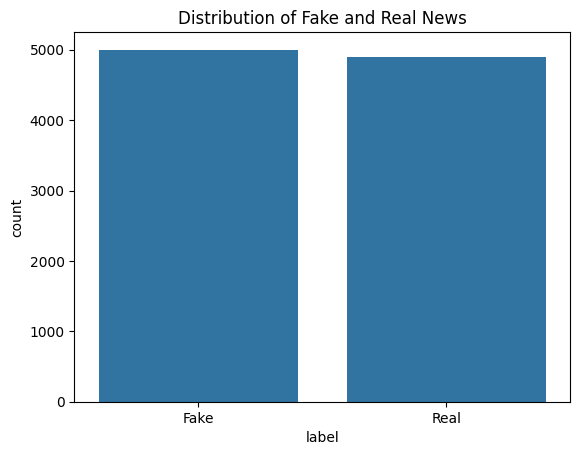

count     9900.000000
mean      2589.005152
std       1397.192659
min        219.000000
25%       1897.000000
50%       2458.000000
75%       3202.000000
max      29849.000000
Name: text_length, dtype: float64


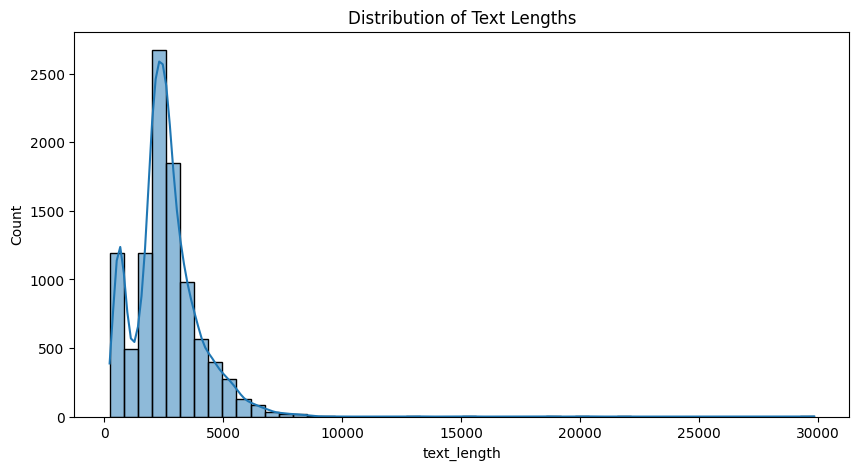

In [4]:
# Check for missing values
print(df.isnull().sum())

# Distribution of the target labels
sns.countplot(x='label', data=df)
plt.title('Distribution of Fake and Real News')
plt.show()

# Descriptive statistics for the text lengths
df['text_length'] = df['Text'].apply(len)
print(df['text_length'].describe())

# Visualizing the distribution of text lengths
plt.figure(figsize=(10,5))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.show()


In [6]:
def clean_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the cleaning function to the text data
df['clean_text'] = df['Text'].apply(clean_text)


In [7]:
# Splitting the dataset into training and test sets
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [8]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_df=0.7, min_df=5, stop_words='english')

# Fit and transform the training data, and transform the test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [9]:
# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9580808080808081
Confusion Matrix:
 [[957  43]
 [ 40 940]]
Classification Report:
               precision    recall  f1-score   support

        Fake       0.96      0.96      0.96      1000
        Real       0.96      0.96      0.96       980

    accuracy                           0.96      1980
   macro avg       0.96      0.96      0.96      1980
weighted avg       0.96      0.96      0.96      1980



In [10]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9888888888888889
Confusion Matrix:
 [[993   7]
 [ 15 965]]
Classification Report:
               precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      1000
        Real       0.99      0.98      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



In [11]:
# Initialize the SVM model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.996969696969697
Confusion Matrix:
 [[995   5]
 [  1 979]]
Classification Report:
               precision    recall  f1-score   support

        Fake       1.00      0.99      1.00      1000
        Real       0.99      1.00      1.00       980

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



In [12]:
# Compare the accuracies of different models
print("Model Comparison:")
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")


Model Comparison:
Naive Bayes Accuracy: 0.96
Logistic Regression Accuracy: 0.99
SVM Accuracy: 1.00


In [13]:
# Load the new dataset
new_data_path = r"C:\Users\pooja\Downloads\train.csv\train.csv"
new_df = pd.read_csv(new_data_path)

# Display the first few rows of the new dataset
print(new_df.head())

# Check the shape and columns of the new dataset
print(new_df.shape)
print(new_df.columns)


                                           Statement  Label
0  Says the Annies List political group supports ...  False
1  When did the decline of coal start? It started...   True
2  Hillary Clinton agrees with John McCain "by vo...   True
3  Health care reform legislation is likely to ma...  False
4  The economic turnaround started at the end of ...   True
(10240, 2)
Index(['Statement', 'Label'], dtype='object')


In [16]:
# Apply the same text cleaning function used earlier
new_df['clean_text'] = new_df['Statement'].apply(clean_text)


In [17]:
# Transform the new data using the previously fitted TF-IDF Vectorizer
X_new_tfidf = tfidf.transform(new_df['clean_text'])


In [18]:
# Predict on the new data using the Naive Bayes model
y_new_pred_nb = nb_model.predict(X_new_tfidf)

# If the new data includes labels, evaluate the performance
if 'label' in new_df.columns:
    y_new_true = new_df['label']
    print("Naive Bayes Accuracy on New Data:", accuracy_score(y_new_true, y_new_pred_nb))
    print("Confusion Matrix:\n", confusion_matrix(y_new_true, y_new_pred_nb))
    print("Classification Report:\n", classification_report(y_new_true, y_new_pred_nb))
else:
    # If there are no labels, just output the predictions
    print("Naive Bayes Predictions on New Data:", y_new_pred_nb)


Naive Bayes Predictions on New Data: ['Real' 'Real' 'Fake' ... 'Real' 'Real' 'Fake']


In [19]:
# Predict on the new data using the Logistic Regression model
y_new_pred_lr = lr_model.predict(X_new_tfidf)

# If the new data includes labels, evaluate the performance
if 'label' in new_df.columns:
    y_new_true = new_df['label']
    print("Logistic Regression Accuracy on New Data:", accuracy_score(y_new_true, y_new_pred_lr))
    print("Confusion Matrix:\n", confusion_matrix(y_new_true, y_new_pred_lr))
    print("Classification Report:\n", classification_report(y_new_true, y_new_pred_lr))
else:
    # If there are no labels, just output the predictions
    print("Logistic Regression Predictions on New Data:", y_new_pred_lr)


Logistic Regression Predictions on New Data: ['Real' 'Real' 'Fake' ... 'Fake' 'Real' 'Fake']


In [20]:
# Predict on the new data using the SVM model
y_new_pred_svm = svm_model.predict(X_new_tfidf)

# If the new data includes labels, evaluate the performance
if 'label' in new_df.columns:
    y_new_true = new_df['label']
    print("SVM Accuracy on New Data:", accuracy_score(y_new_true, y_new_pred_svm))
    print("Confusion Matrix:\n", confusion_matrix(y_new_true, y_new_pred_svm))
    print("Classification Report:\n", classification_report(y_new_true, y_new_pred_svm))
else:
    # If there are no labels, just output the predictions
    print("SVM Predictions on New Data:", y_new_pred_svm)


SVM Predictions on New Data: ['Real' 'Real' 'Fake' ... 'Fake' 'Real' 'Fake']
